Joseph Breneman: Navigating the Night Sky
=========================================

In [634]:
import numpy as np
import pandas as pd
from astroplan import Observer
from astropy import coordinates
from astropy.coordinates import EarthLocation
from astropy.time import Time
from astroplan.plots import plot_airmass
from astropy.coordinates import get_sun, get_body, get_moon
from astroplan import moon_illumination
from astroplan import MoonSeparationConstraint, observability_table
import astropy.units as u
from astroplan import AltitudeConstraint, AirmassConstraint, AtNightConstraint
from astroplan import Constraint
from astropy.coordinates import SkyCoord
from astroplan import FixedTarget

## Reading in data (Name, RA, and DEC) for 97 Quasars from the Milliquas database

In [635]:
quasars=pd.read_fwf('quasars3.txt', skiprows=4, delimiter='|')
quasars[0:10]

,name,ra,dec
0,WISEA J055431.47-431632.4,05 54 31.48,-43 16 32.5
1,WISEA J095244.92-431631.2,09 52 44.93,-43 16 31.3
2,WISEA J050310.49-431630.1,05 03 10.49,-43 16 30.1
3,WISEA J200949.47-431629.9,20 09 49.48,-43 16 30.0
4,WISEA J130532.19-431629.1,13 05 32.20,-43 16 29.2
5,WISEA J213253.22-431629.1,21 32 53.22,-43 16 29.2
6,WISEA J125759.35-431627.0,12 57 59.36,-43 16 27.1
7,WISEA J095142.02-431626.9,09 51 42.02,-43 16 26.9
8,WISEA J122754.06-431626.5,12 27 54.07,-43 16 26.5
9,WISEA J053425.45-431624.3,05 34 25.46,-43 16 24.3


## Defining our observation location, The Du Pont 2.5m telescope at Las Campanas Observatory in Chile.

In [636]:
dupont=Observer.at_site("lco")
dupont

<Observer: name='lco',
    location (lon, lat, el)=(-70.70166666666665 deg, -29.003333333333327 deg, 2281.9999999994607 m),
    timezone=<UTC>>

## Now we are going to use FixedTarget with SkyCoord coordinates to feed our data into an observability table.

In [637]:
table_values=quasars.as_matrix()

targets=[FixedTarget(coord=SkyCoord(RA, DEC, unit=[u.hour,u.deg]), name=Name)
           for Name, RA, DEC in table_values]

targets[0:10]

/Users/josephbreneman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


[<FixedTarget "WISEA J055431.47-431632.4" at SkyCoord (ICRS): (ra, dec) in deg (88.63116667, -43.27569444)>,
 <FixedTarget "WISEA J095244.92-431631.2" at SkyCoord (ICRS): (ra, dec) in deg (148.18720833, -43.27536111)>,
 <FixedTarget "WISEA J050310.49-431630.1" at SkyCoord (ICRS): (ra, dec) in deg (75.79370833, -43.27502778)>,
 <FixedTarget "WISEA J200949.47-431629.9" at SkyCoord (ICRS): (ra, dec) in deg (302.45616667, -43.275)>,
 <FixedTarget "WISEA J130532.19-431629.1" at SkyCoord (ICRS): (ra, dec) in deg (196.38416667, -43.27477778)>,
 <FixedTarget "WISEA J213253.22-431629.1" at SkyCoord (ICRS): (ra, dec) in deg (323.22175, -43.27477778)>,
 <FixedTarget "WISEA J125759.35-431627.0" at SkyCoord (ICRS): (ra, dec) in deg (194.49733333, -43.27419444)>,
 <FixedTarget "WISEA J095142.02-431626.9" at SkyCoord (ICRS): (ra, dec) in deg (147.92508333, -43.27413889)>,
 <FixedTarget "WISEA J122754.06-431626.5" at SkyCoord (ICRS): (ra, dec) in deg (186.97529167, -43.27402778)>,
 <FixedTarget "WISEA

In [638]:
from astropy.table import Table
from astroplan import is_observable, is_always_observable, months_observable
from astroplan.utils import time_grid_from_range

In [639]:
# Now we are going to make a mask of constraining factors that we will fit into our observing table to rule out
# any objects that won't be observable during our observing window.
constraints=[AirmassConstraint(1.5), AtNightConstraint.twilight_astronomical(), MoonSeparationConstraint(35*u.deg)]

# Now we will define our observing time window.
beginning=Time(['2019-05-15'])
end=Time(['2019-05-30'])

window_range=[beginning, end]
window_time_grid=time_grid_from_range(window_range)
observation_range=Time(['2019-05-15','2019-05-30'])

observing_table=observability_table(constraints, dupont, targets, time_range=observation_range)
observing_table

target name,ever observable,always observable,fraction of time observable
str25,bool,bool,float64
WISEA J055431.47-431632.4,False,False,0.0
WISEA J095244.92-431631.2,True,False,0.1361111111111111
WISEA J050310.49-431630.1,False,False,0.0
WISEA J200949.47-431629.9,True,False,0.1388888888888889
WISEA J130532.19-431629.1,True,False,0.2708333333333333
WISEA J213253.22-431629.1,True,False,0.10555555555555556
WISEA J125759.35-431627.0,True,False,0.2652777777777778
WISEA J095142.02-431626.9,True,False,0.1361111111111111
WISEA J122754.06-431626.5,True,False,0.24444444444444444


In [640]:
obs=observing_table['ever observable']==True
print('The number of observable objects is:', obs.sum())

The number of observable objects is: 62


## Now since we have 62 objects that are observable we are going to narrow it down to the top ten objects with the longest amount of viewing time available for our time window.

In [641]:
observing_table1=observing_table.to_pandas()

#This mask will sort out the top ten objects for the best viewing, this took a little fine tuning.
mask=observing_table1['fraction of time observable'] >= 0.235

observable=observing_table1[mask]['target name']
observable

4     WISEA J130532.19-431629.1
6     WISEA J125759.35-431627.0
8     WISEA J122754.06-431626.5
10    WISEA J134136.66-431624.0
30    WISEA J140608.56-431610.3
38    WISEA J131601.61-431606.1
49    WISEA J121750.29-431556.3
52    WISEA J121753.42-431553.6
74    WISEA J150803.55-431536.1
87    WISEA J125448.19-431525.8
88    WISEA J144407.40-431524.6
Name: target name, dtype: object

In [642]:
# Now we are going to extract our 10 most favorable objects from our FixedTarget list to define a tuple containing 
# only those targets.
target_10=(targets[4], targets[6], targets[8], targets[10], targets[30], targets[38], targets[49], 
        targets[52], targets[74], targets[87])
target_10

(<FixedTarget "WISEA J130532.19-431629.1" at SkyCoord (ICRS): (ra, dec) in deg (196.38416667, -43.27477778)>,
 <FixedTarget "WISEA J125759.35-431627.0" at SkyCoord (ICRS): (ra, dec) in deg (194.49733333, -43.27419444)>,
 <FixedTarget "WISEA J122754.06-431626.5" at SkyCoord (ICRS): (ra, dec) in deg (186.97529167, -43.27402778)>,
 <FixedTarget "WISEA J134136.66-431624.0" at SkyCoord (ICRS): (ra, dec) in deg (205.40279167, -43.27336111)>,
 <FixedTarget "WISEA J140608.56-431610.3" at SkyCoord (ICRS): (ra, dec) in deg (211.53570833, -43.26955556)>,
 <FixedTarget "WISEA J131601.61-431606.1" at SkyCoord (ICRS): (ra, dec) in deg (199.00675, -43.26838889)>,
 <FixedTarget "WISEA J121750.29-431556.3" at SkyCoord (ICRS): (ra, dec) in deg (184.45954167, -43.26563889)>,
 <FixedTarget "WISEA J121753.42-431553.6" at SkyCoord (ICRS): (ra, dec) in deg (184.472625, -43.26491667)>,
 <FixedTarget "WISEA J150803.55-431536.1" at SkyCoord (ICRS): (ra, dec) in deg (227.01483333, -43.26005556)>,
 <FixedTarget "

## Airmass plot, becuase it will give us the optimal time for viewing, on the optimal night (05/30/2019), and they're cool looking.

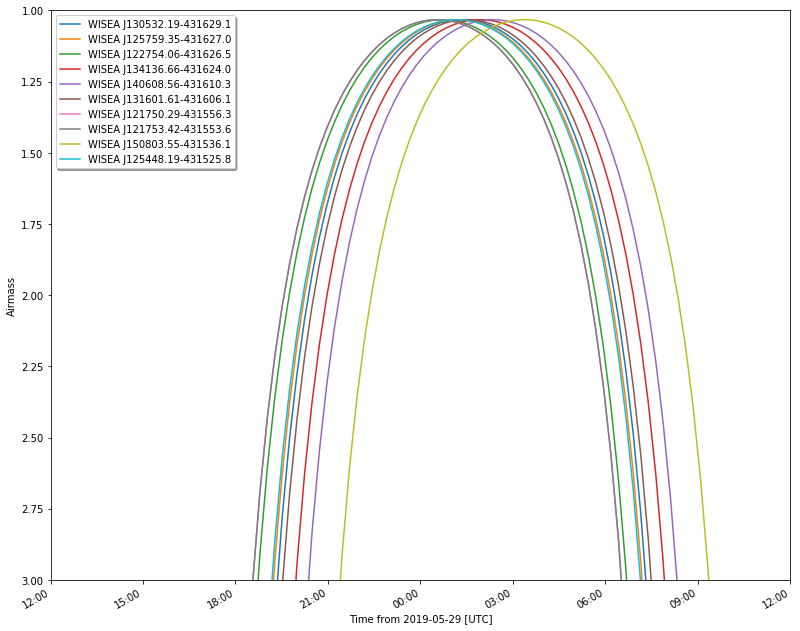

In [643]:
import matplotlib.pyplot as plt
from astroplan.plots import plot_airmass

fig,ax = plt.subplots(1,1)
fig.set_size_inches(11,8.5) 

fig.tight_layout()

observation_time = Time('2019-05-30')
plot_airmass(target_10, dupont, observation_time)
ax.legend(loc=0,shadow=True)
plt.show()

The Moon
========

In [644]:
#We can now establish the moon illumination, phase and position during our observing time window.

time=np.arange('2019-05-15', '2019-05-31', dtype='datetime64[D]')
start_time=(['2019-05-15'])
end_time=(['2019-05-30'])

moon_position=dupont.moon_altaz(time)

moon_ratio=dupont.moon_illumination(time)
moon_ratio

moon_phase = dupont.moon_phase(time)
print('The moon phase as a value of radians. 0 = full moon, π = new moon.\n', moon_phase)

The moon phase as a value of radians. 0 = full moon, π = new moon.
 [0.88831637 0.6586472  0.43176186 0.21192157 0.07238651 0.24816147
 0.45501737 0.65920405 0.85897168 1.05458923 1.24694396 1.43723874
 1.6268483  1.81721446 2.00975029 2.20574009] rad


In [645]:
print('The percentage of full moon brightness during observation window:\n', moon_ratio*100)

The percentage of full moon brightness during observation window:
 [81.53597183 89.54104652 95.41149365 98.88142693 99.869062   98.46828216
 94.91266974 89.52399956 82.66082154 74.67925106 65.91105085 56.65804407
 47.19886869 37.803407   28.75035872 20.34338801]


In [646]:
print(moon_position)

<SkyCoord (AltAz: obstime=['2019-05-15T00:00:00.000000000' '2019-05-16T00:00:00.000000000'
 '2019-05-17T00:00:00.000000000' '2019-05-18T00:00:00.000000000'
 '2019-05-19T00:00:00.000000000' '2019-05-20T00:00:00.000000000'
 '2019-05-21T00:00:00.000000000' '2019-05-22T00:00:00.000000000'
 '2019-05-23T00:00:00.000000000' '2019-05-24T00:00:00.000000000'
 '2019-05-25T00:00:00.000000000' '2019-05-26T00:00:00.000000000'
 '2019-05-27T00:00:00.000000000' '2019-05-28T00:00:00.000000000'
 '2019-05-29T00:00:00.000000000' '2019-05-30T00:00:00.000000000'], location=(1845655.49905341, -5270856.2947176, -3075330.77760682) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt, distance) in (deg, deg, m)
    [( 38.2513141 ,  50.25410418, 3.64499501e+08),
     ( 57.73074422,  46.36064215, 3.65987031e+08),
     ( 73.65642922,  39.7210783 , 3.68575877e+08),
     ( 86.22718273,  31.39065209, 3.72228689e+08),
     ( 96.34349594,  22.16205462, 3.76802302e+08),
     (104

## We already established in our observation constraints mask that none of our Quasars are within 35˚ angular distance of the moon

## To achieve a good "Dark" observation time, we would want to observe towards the end of the month (05/29/2019 and 05/30/2019 would be the two optimal dates for observing) when the phase is within a couple of days of a New Moon.

## The moon phase during our observing window starts as a Waxing Gibbous (05/15/2019), then moves to a Full Moon (05/18/2019), and ends as a Waning Crescent (05/30/2019). These phases were cross-checked with [Moon Phases May 2019](https://www.calendar-12.com/moon_calendar/2019/may).